# Parte 1 — SIR con dinámica vital

**Objetivo.** Simular el modelo SIR con nacimientos y muertes y visualizar cómo las trayectorias del sistema convergen a los puntos de equilibrio en el espacio de estados.

---
## Guía (según enunciado)
1. **Implementar el Modelo:** Escriba una función de Python que tome como entrada el estado del sistema $(S,I)$, el tiempo $t$, y los parámetros del modelo $(\beta, \gamma, \mu, N)$, y devuelva las tasas de cambio $[dS/dt, dI/dt]$.
2. **Configurar la Simulación:** Utilice los siguientes parámetros, que aseguran que $R_0>1$:
   - $N=1000$ (población total)
   - $\beta = 0.5/N$ (tasa de transmisión, *normalizada por N*)
   - $\gamma = 0.1$ (tasa de recuperación; periodo infeccioso de 10 días)
   - $\mu = 0.02$ (tasa de natalidad/mortalidad; esperanza de vida $1/\mu = 50$)
3. **Simular Trayectorias:** Simule por 300 días para dos condiciones iniciales:
   - **Caso A (inicio de brote):** $(S_0, I_0)=(999,\,1)$
   - **Caso B (epidemia mayor):** $(S_0, I_0)=(700,\,300)$
4. **Visualizar el Espacio de Estados:**
   - Genere un único gráfico con $S$ en eje X e $I$ en eje Y.
   - Grafique las dos trayectorias simuladas.
   - Calcule y marque claramente los puntos de equilibrio: **ELE** (libre de enfermedad) y **Endémico**.


## 1) Modelo SIR con dinámica vital

Ecuaciones (con $N$ constante por nacimientos=muertes):
\begin{align}
\frac{dS}{dt} &= \mu N - \beta S I - \mu S, \\
\frac{dI}{dt} &= \beta S I - (\gamma+\mu) I, \\
R &= N - S - I.
\end{align}




In [1]:
# 1) Implementación del modelo
import numpy as np
from scipy.integrate import solve_ivp

def sir_vital_rhs(t, y, beta, gamma, mu, N):
    S, I = y
    dS = mu*N - beta*S*I - mu*S
    dI = beta*S*I - (gamma + mu)*I
    return [dS, dI]


## 2) Parámetros y configuración de simulación

- $N=1000$  
- $\beta = 0.5/N$  
- $\gamma = 0.1$  
- $\mu = 0.02$  
- Horizonte: 300 días  
- Condiciones iniciales:  
  - Caso A: $(999,\,1)$  
  - Caso B: $(700,\,300)$


In [2]:
# 2) Parámetros
N = 1000
beta = 0.5 / N
gamma = 0.1
mu = 0.02

t_span = (0, 300)
t_eval = np.linspace(t_span[0], t_span[1], 2001)

# Condiciones iniciales
y0_A = [999.0, 1.0]     # Caso A
y0_B = [700.0, 300.0]   # Caso B


## 3) Simulación de trayectorias


In [3]:
# 3) Resolver el sistema para ambos casos
sol_A = solve_ivp(sir_vital_rhs, t_span, y0_A, t_eval=t_eval, args=(beta, gamma, mu, N), rtol=1e-8, atol=1e-10)
sol_B = solve_ivp(sir_vital_rhs, t_span, y0_B, t_eval=t_eval, args=(beta, gamma, mu, N), rtol=1e-8, atol=1e-10)

S_A, I_A = sol_A.y
S_B, I_B = sol_B.y
R_A = N - S_A - I_A
R_B = N - S_B - I_B


## 4) Número reproductivo básico y puntos de equilibrio
Con dinámica vital, si $R_0>1$ existe equilibrio endémico.

$$\displaystyle R_0 = \frac{\beta N}{\gamma+\mu}, \qquad S^*_{\text{end}} = \frac{\gamma+\mu}{\beta}, \qquad I^*_{\text{end}} = \frac{\mu\,(N - S^*_{\text{end}})}{\gamma+\mu}$$

El equilibrio libre de enfermedad (ELE) es $(S^*_{ELE}, I^*_{ELE})=(N, 0)$.


In [4]:
# 4) Cálculo de R0 y equilibria
R0 = (beta * N) / (gamma + mu)
S_star_end = (gamma + mu) / beta
I_star_end = mu * (N - S_star_end) / (gamma + mu)

S_star_ele, I_star_ele = N, 0.0

print(f"R0 = {R0:.4f}")
print(f"ELE: S*={S_star_ele:.4f}, I*={I_star_ele:.4f}")
print(f"Endémico: S*={S_star_end:.4f}, I*={I_star_end:.4f}")


R0 = 4.1667
ELE: S*=1000.0000, I*=0.0000
Endémico: S*=240.0000, I*=126.6667


## 5) Espacio de estados $S$–$I$
- Un único gráfico con $S$ en X e $I$ en Y.
- Trazar ambas trayectorias.
- Marcar ELE y Endémico.
- (Opcional) Sombrear la región factible $S\ge 0, I\ge 0, S+I\le N$.


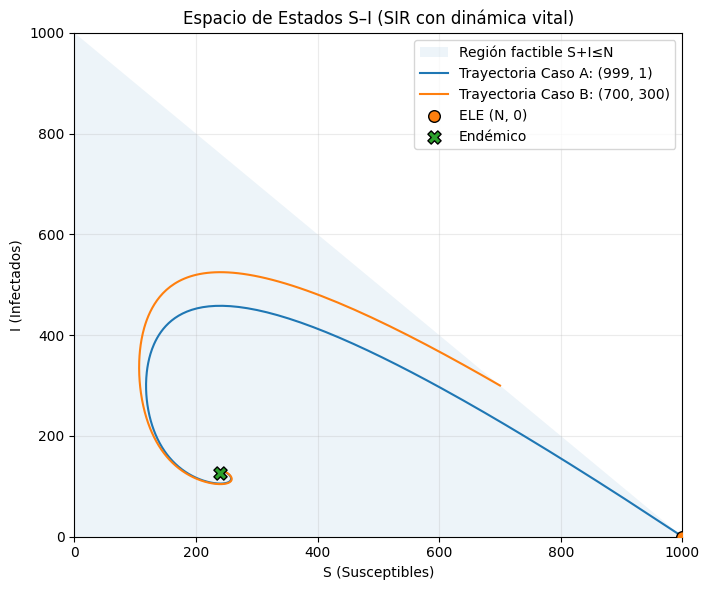

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7.2, 6))

# Región factible (opcional)
S_region = np.linspace(0, N, 200)
I_max = N - S_region
plt.fill_between(S_region, 0, I_max, alpha=0.08, label="Región factible S+I≤N")

# Trayectorias
plt.plot(S_A, I_A, label="Trayectoria Caso A: (999, 1)")
plt.plot(S_B, I_B, label="Trayectoria Caso B: (700, 300)")

# Equilibrios
plt.scatter([S_star_ele], [I_star_ele], marker='o', s=70, edgecolor='k', zorder=5, label="ELE (N, 0)")
plt.scatter([S_star_end], [I_star_end], marker='X', s=90, edgecolor='k', zorder=6, label="Endémico")

plt.xlabel("S (Susceptibles)")
plt.ylabel("I (Infectados)")
plt.title("Espacio de Estados S–I (SIR con dinámica vital)")
plt.xlim(0, N)
plt.ylim(0, N)
plt.grid(True, alpha=0.25)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


## 6) Resultados solicitados
1. **Parámetros usados:** $N=1000$, $\beta=0.5/N$, $\gamma=0.1$, $\mu=0.02$, horizonte $=300$ días.
2. **Número reproductivo básico:** se imprime en la celda de cálculo de $R_0$.
3. **Puntos de equilibrio (numéricos):**
   - **ELE:** $(S^*, I^*)=(N, 0)$.
   - **Endémico:** $(S^*, I^*)=\big((\gamma+\mu)/\beta,\; \mu(N-S^*)/(\gamma+\mu)\big)$.
4. **Gráfico del espacio de estados:** generado en la sección 5.


## 7) Series temporales $S(t), I(t), R(t)$


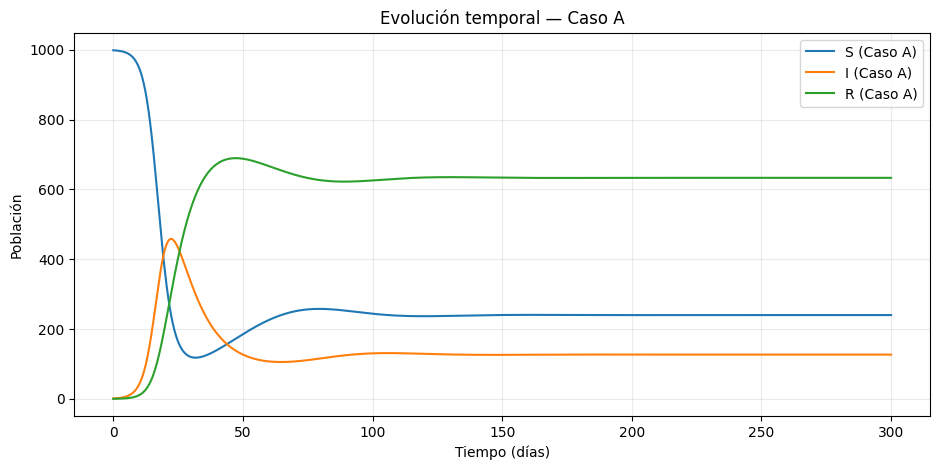

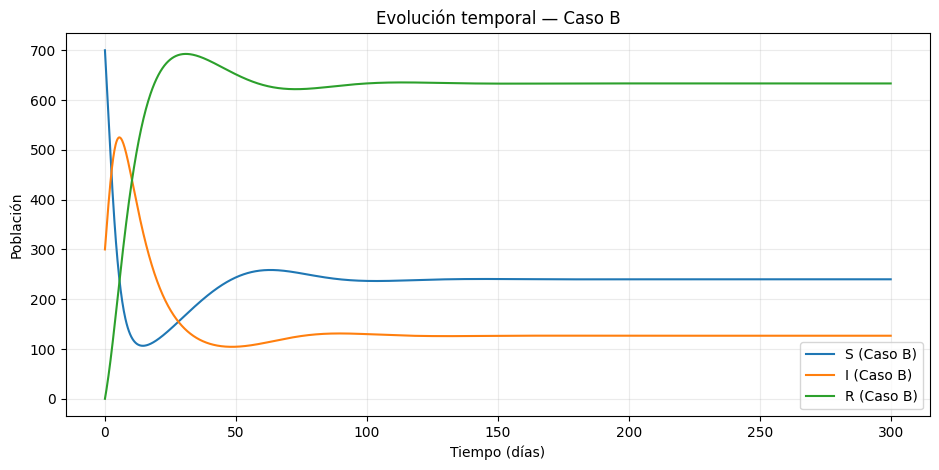

In [6]:
plt.figure(figsize=(9.5, 4.8))
plt.plot(sol_A.t, S_A, label="S (Caso A)")
plt.plot(sol_A.t, I_A, label="I (Caso A)")
plt.plot(sol_A.t, R_A, label="R (Caso A)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Población")
plt.title("Evolución temporal — Caso A")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9.5, 4.8))
plt.plot(sol_B.t, S_B, label="S (Caso B)")
plt.plot(sol_B.t, I_B, label="I (Caso B)")
plt.plot(sol_B.t, R_B, label="R (Caso B)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Población")
plt.title("Evolución temporal — Caso B")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


### Notas
- Con los parámetros dados: $R_0 = \frac{0.5}{0.1+0.02} \approx 4.167>1$, por lo que existe equilibrio endémico y las trayectorias tienden a él.



## Conclusiones

1. **Comportamiento general del modelo:**  
   El modelo SIR con dinámica vital muestra que, cuando el número reproductivo básico \(R_0 > 1\), el sistema evoluciona hacia un equilibrio endémico. En ambos escenarios simulados (brote inicial y epidemia mayor), las trayectorias convergen al mismo punto de equilibrio, evidenciando la estabilidad del sistema ante distintas condiciones iniciales.

2. **Interpretación epidemiológica:**  
   Los resultados confirman que la inclusión de la tasa de natalidad y mortalidad (\(\mu > 0\)) permite la reposición constante de susceptibles, lo cual mantiene la infección en la población de forma persistente. El equilibrio endémico encontrado \((S^* \approx 240, I^* \approx 127)\) representa una situación donde la enfermedad nunca desaparece completamente, sino que se estabiliza en niveles moderados.

3. **Análisis dinámico y control:**  
   Las gráficas temporales muestran oscilaciones amortiguadas que reflejan la competencia entre la transmisión y la recuperación. A largo plazo, la población alcanza un régimen estacionario donde los valores de \(S\) e \(I\) se mantienen constantes. Reducir \(R_0\) por debajo de 1, ya sea disminuyendo \(\beta\) o aumentando \(\gamma\), sería la condición necesaria para erradicar la infección y desplazar el sistema al equilibrio libre de enfermedad.
